# --------------------------
# Drishtant Jain(24M1085)
# SOC'25
# Project  Sketch2Pix
# --------------------------

**MNIST Digit Classification**

In [1]:
# importing all the necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Loading the Dataset using Tensorflow
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


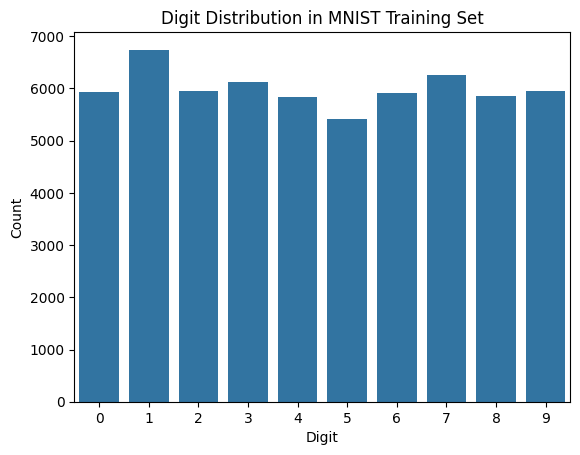

In [4]:
# Plotting the Class Distribution
sns.countplot(x=y_train)
plt.title("Digit Distribution in MNIST Training Set")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

In [71]:
(unique, counts) = np.unique(y_train, return_counts=True)

print("Digit counts:", dict(zip(unique, counts)))
print(f"Min samples: {np.min(counts)}")
print(f"Max samples: {np.max(counts)}")
print(f"Max/Min ratio: {np.max(counts) / np.min(counts):.2f}")


Digit counts: {np.uint8(0): np.int64(5923), np.uint8(1): np.int64(6742), np.uint8(2): np.int64(5958), np.uint8(3): np.int64(6131), np.uint8(4): np.int64(5842), np.uint8(5): np.int64(5421), np.uint8(6): np.int64(5918), np.uint8(7): np.int64(6265), np.uint8(8): np.int64(5851), np.uint8(9): np.int64(5949)}
Min samples: 5421
Max samples: 6742
Max/Min ratio: 1.24


**Since the Max/Min Ratio is less than 1.5,We can Say the Dataset is Balanced.This ensures that model evaluation metrics will not be biased by class imbalance.**

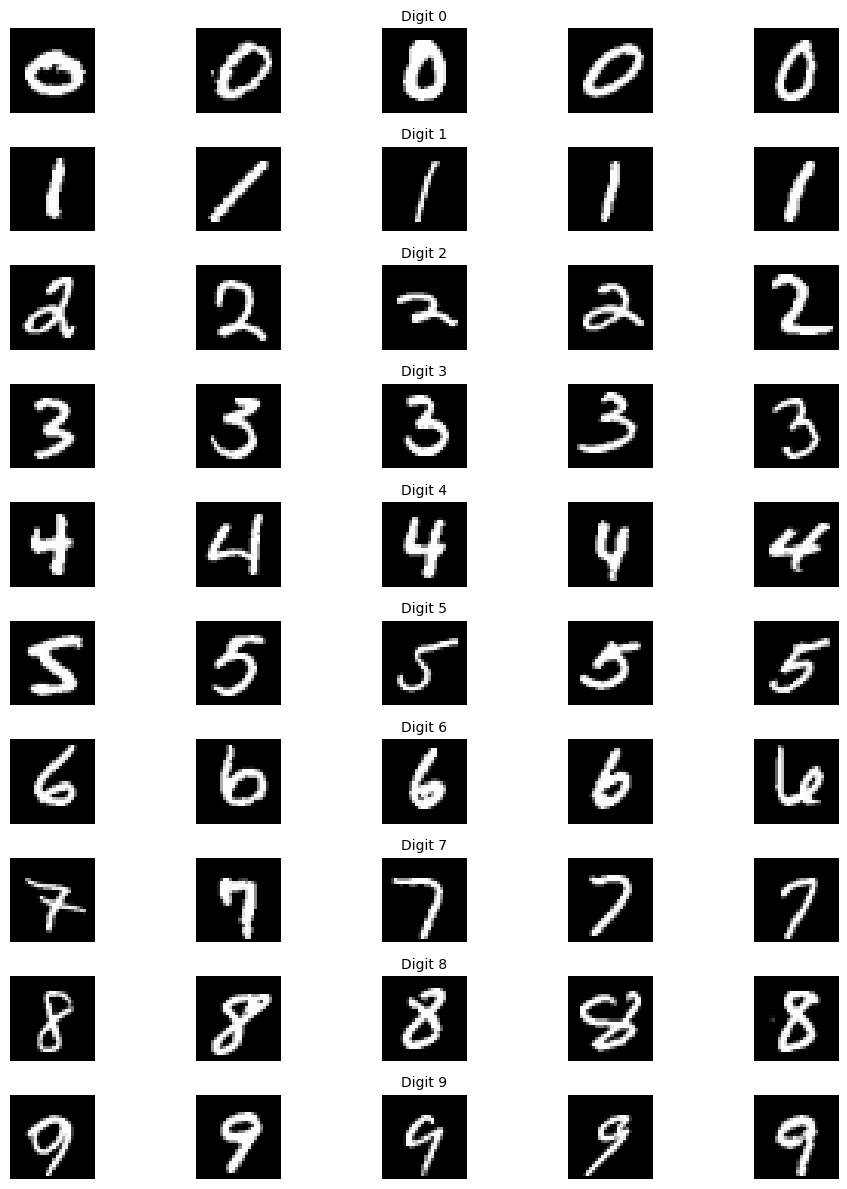

In [72]:
# function to visualise some functions of each class
def show_samples_per_class(x, y):
    fig, axes = plt.subplots(10, 5, figsize=(10, 12))
    for digit in range(10):
        digit_idxs = np.where(y == digit)[0]
        for i in range(5):
            idx = np.random.choice(digit_idxs)
            ax = axes[digit, i]
            ax.imshow(x[idx], cmap='gray')
            ax.axis('off')
            if i == 2:
                ax.set_title(f"Digit {digit}", fontsize=10)
    plt.tight_layout()
    plt.show()

show_samples_per_class(x_train, y_train)


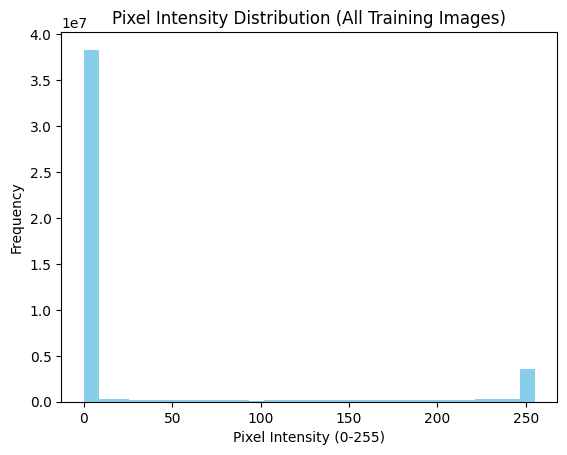

In [6]:
# To check the Pixel Intensity of all training Images
plt.hist(x_train.flatten(), bins=30, color='skyblue')
plt.title("Pixel Intensity Distribution (All Training Images)")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.show()


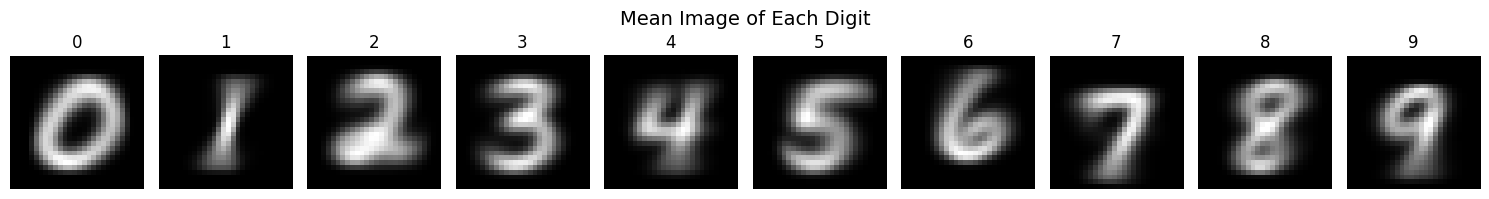

In [73]:
# Averaging Pixel for each class to get mean Image of Each Digit
fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for digit in range(10):
    mean_img = np.mean(x_train[y_train == digit], axis=0)
    axes[digit].imshow(mean_img, cmap='gray')
    axes[digit].set_title(str(digit))
    axes[digit].axis('off')
plt.suptitle("Mean Image of Each Digit" ,fontsize=14)
plt.tight_layout()
plt.show()


In [11]:
# Function to Plot Learning Curves
def plot_learning_curves(history, model_name="Model"):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.title(f'{model_name} - Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [74]:
# Flattenning and normalizing input
x_train_nn = x_train.reshape(-1, 784) / 255.0
x_test_nn = x_test.reshape(-1, 784) / 255.0

# One-hot encode labels for classification
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


Model 1 : Neural Network

In [44]:
model_nn = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])


In [45]:
model_nn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [46]:

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks_nn = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("model_nn_best.keras", save_best_only=True),
    ReduceLROnPlateau(patience=2, factor=0.5)
]


In [47]:
history_nn = model_nn.fit(
    x_train_nn, y_train_cat,
    epochs=15,
    batch_size=128,
    validation_split=0.1,
    #callbacks=callbacks_nn,
    verbose=2
)


Epoch 1/15
422/422 - 5s - 13ms/step - accuracy: 0.8568 - loss: 0.4788 - val_accuracy: 0.9583 - val_loss: 0.1495
Epoch 2/15
422/422 - 2s - 5ms/step - accuracy: 0.9390 - loss: 0.2075 - val_accuracy: 0.9690 - val_loss: 0.1057
Epoch 3/15
422/422 - 1s - 3ms/step - accuracy: 0.9519 - loss: 0.1609 - val_accuracy: 0.9732 - val_loss: 0.0918
Epoch 4/15
422/422 - 1s - 3ms/step - accuracy: 0.9602 - loss: 0.1311 - val_accuracy: 0.9752 - val_loss: 0.0858
Epoch 5/15
422/422 - 1s - 3ms/step - accuracy: 0.9660 - loss: 0.1110 - val_accuracy: 0.9758 - val_loss: 0.0810
Epoch 6/15
422/422 - 2s - 4ms/step - accuracy: 0.9689 - loss: 0.1005 - val_accuracy: 0.9768 - val_loss: 0.0813
Epoch 7/15
422/422 - 2s - 4ms/step - accuracy: 0.9714 - loss: 0.0915 - val_accuracy: 0.9790 - val_loss: 0.0746
Epoch 8/15
422/422 - 2s - 5ms/step - accuracy: 0.9745 - loss: 0.0813 - val_accuracy: 0.9783 - val_loss: 0.0760
Epoch 9/15
422/422 - 1s - 3ms/step - accuracy: 0.9771 - loss: 0.0729 - val_accuracy: 0.9802 - val_loss: 0.0739


**Observations**: Initially I tried for 10,15,20 epochs but it was getting overfitted so i had to introduce dropout layers

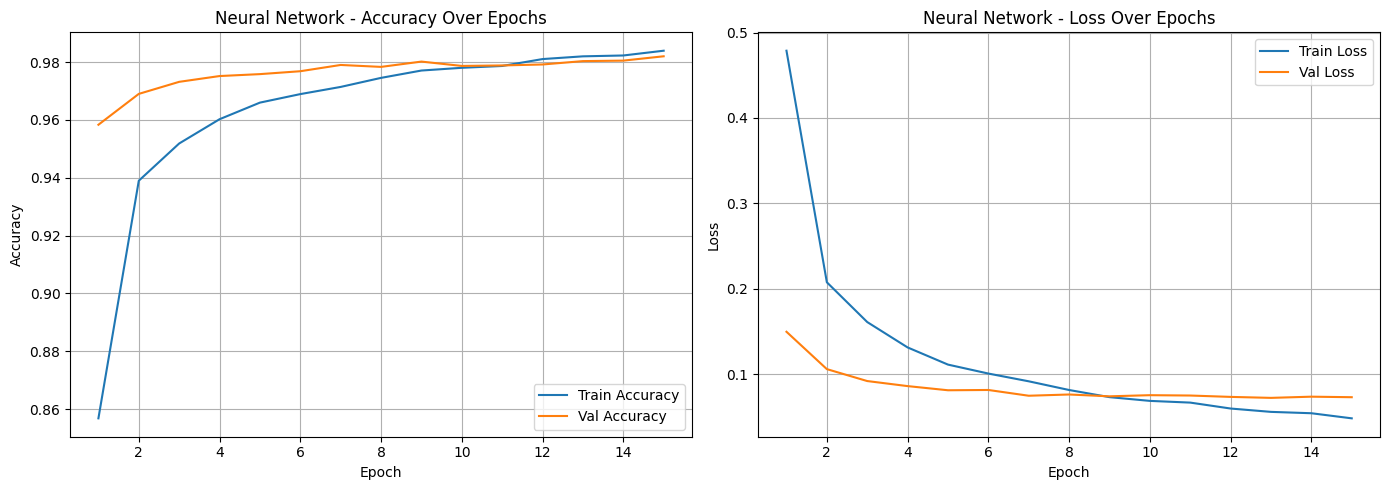

In [48]:
plot_learning_curves(history_nn, "Neural Network")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


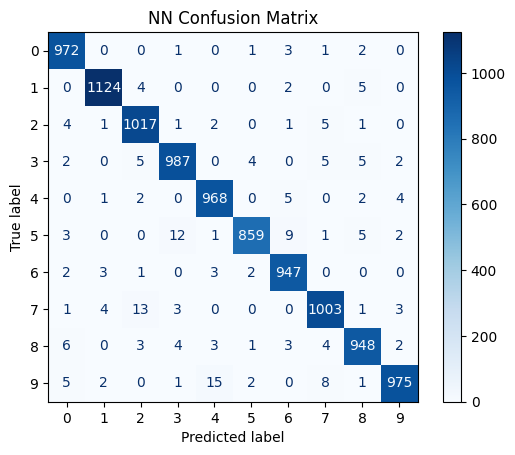

In [75]:
# Making the Confusion Matrix to Check the Classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_nn = np.argmax(model_nn.predict(x_test_nn), axis=1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nn, cmap='Blues')
plt.title("NN Confusion Matrix")
plt.show()


In [50]:
# AUC Score for NN
from sklearn.metrics import roc_auc_score

y_prob_nn = model_nn.predict(x_test_nn)
auc_nn = roc_auc_score(y_test_cat, y_prob_nn, multi_class='ovr')
print(f"AUC Score (NN): {auc_nn:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
AUC Score (NN): 0.9997


Model 2: CNN

In [51]:
# Data Preparation for CNN
x_train_cnn = x_train[..., np.newaxis] / 255.0
x_test_cnn = x_test[..., np.newaxis] / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [53]:
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),  # helps reduce overfitting
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [55]:
history_cnn = model_cnn.fit(
    x_train_cnn, y_train_cat,
    epochs=15,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)


Epoch 1/15
422/422 - 10s - 23ms/step - accuracy: 0.8985 - loss: 0.3361 - val_accuracy: 0.9808 - val_loss: 0.0621
Epoch 2/15
422/422 - 4s - 8ms/step - accuracy: 0.9699 - loss: 0.1027 - val_accuracy: 0.9840 - val_loss: 0.0523
Epoch 3/15
422/422 - 3s - 8ms/step - accuracy: 0.9767 - loss: 0.0762 - val_accuracy: 0.9865 - val_loss: 0.0449
Epoch 4/15
422/422 - 4s - 8ms/step - accuracy: 0.9814 - loss: 0.0611 - val_accuracy: 0.9867 - val_loss: 0.0428
Epoch 5/15
422/422 - 2s - 4ms/step - accuracy: 0.9842 - loss: 0.0508 - val_accuracy: 0.9873 - val_loss: 0.0405
Epoch 6/15
422/422 - 3s - 6ms/step - accuracy: 0.9860 - loss: 0.0441 - val_accuracy: 0.9885 - val_loss: 0.0389
Epoch 7/15
422/422 - 2s - 5ms/step - accuracy: 0.9880 - loss: 0.0377 - val_accuracy: 0.9895 - val_loss: 0.0372
Epoch 8/15
422/422 - 2s - 5ms/step - accuracy: 0.9903 - loss: 0.0310 - val_accuracy: 0.9893 - val_loss: 0.0370
Epoch 9/15
422/422 - 3s - 6ms/step - accuracy: 0.9900 - loss: 0.0312 - val_accuracy: 0.9902 - val_loss: 0.0386

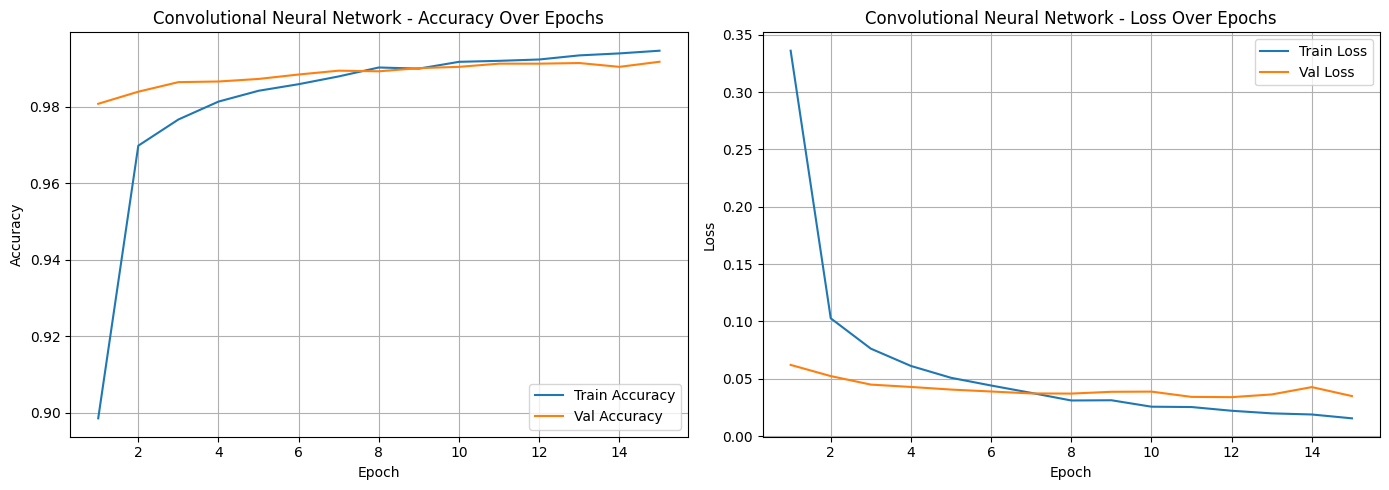

In [56]:
# Plotting Accuracy v/s Epochs and Loss v/s Epochs for CNN
plot_learning_curves(history_cnn, "Convolutional Neural Network")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


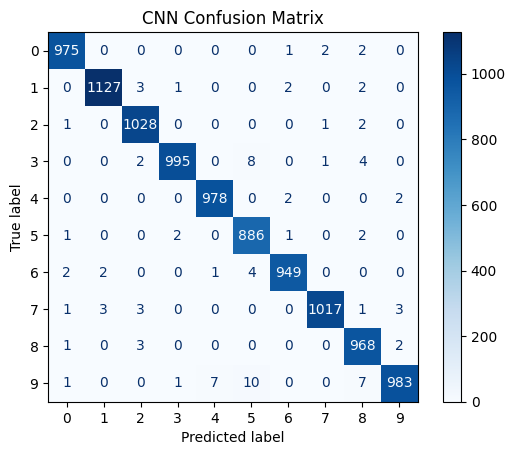

In [57]:
# CNN Confusion Matrix to check class classifications
y_pred_cnn = np.argmax(model_cnn.predict(x_test_cnn), axis=1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_cnn, cmap='Blues')
plt.title("CNN Confusion Matrix")
plt.show()

In [58]:
y_prob_cnn = model_cnn.predict(x_test_cnn)
auc_cnn = roc_auc_score(y_test_cat, y_prob_cnn, multi_class='ovr')
print(f"AUC Score (CNN): {auc_cnn:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
AUC Score (CNN): 1.0000


Model 3: RNN

In [59]:
# Data Preparation for RNN
x_train_rnn = x_train / 255.0
x_test_rnn = x_test / 255.0


In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model_rnn = Sequential([
    LSTM(64, return_sequences=True, input_shape=(28, 28)),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [62]:
model_rnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [63]:
history_rnn = model_rnn.fit(
    x_train_rnn, y_train_cat,
    epochs=15,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)


Epoch 1/15
422/422 - 8s - 20ms/step - accuracy: 0.7227 - loss: 0.8504 - val_accuracy: 0.9163 - val_loss: 0.2791
Epoch 2/15
422/422 - 8s - 18ms/step - accuracy: 0.9177 - loss: 0.2940 - val_accuracy: 0.9537 - val_loss: 0.1556
Epoch 3/15
422/422 - 4s - 9ms/step - accuracy: 0.9460 - loss: 0.1965 - val_accuracy: 0.9627 - val_loss: 0.1308
Epoch 4/15
422/422 - 4s - 10ms/step - accuracy: 0.9589 - loss: 0.1501 - val_accuracy: 0.9692 - val_loss: 0.1060
Epoch 5/15
422/422 - 3s - 8ms/step - accuracy: 0.9661 - loss: 0.1245 - val_accuracy: 0.9760 - val_loss: 0.0813
Epoch 6/15
422/422 - 4s - 9ms/step - accuracy: 0.9716 - loss: 0.1035 - val_accuracy: 0.9783 - val_loss: 0.0743
Epoch 7/15
422/422 - 4s - 10ms/step - accuracy: 0.9754 - loss: 0.0897 - val_accuracy: 0.9807 - val_loss: 0.0722
Epoch 8/15
422/422 - 7s - 17ms/step - accuracy: 0.9772 - loss: 0.0839 - val_accuracy: 0.9827 - val_loss: 0.0610
Epoch 9/15
422/422 - 8s - 20ms/step - accuracy: 0.9805 - loss: 0.0713 - val_accuracy: 0.9842 - val_loss: 0.

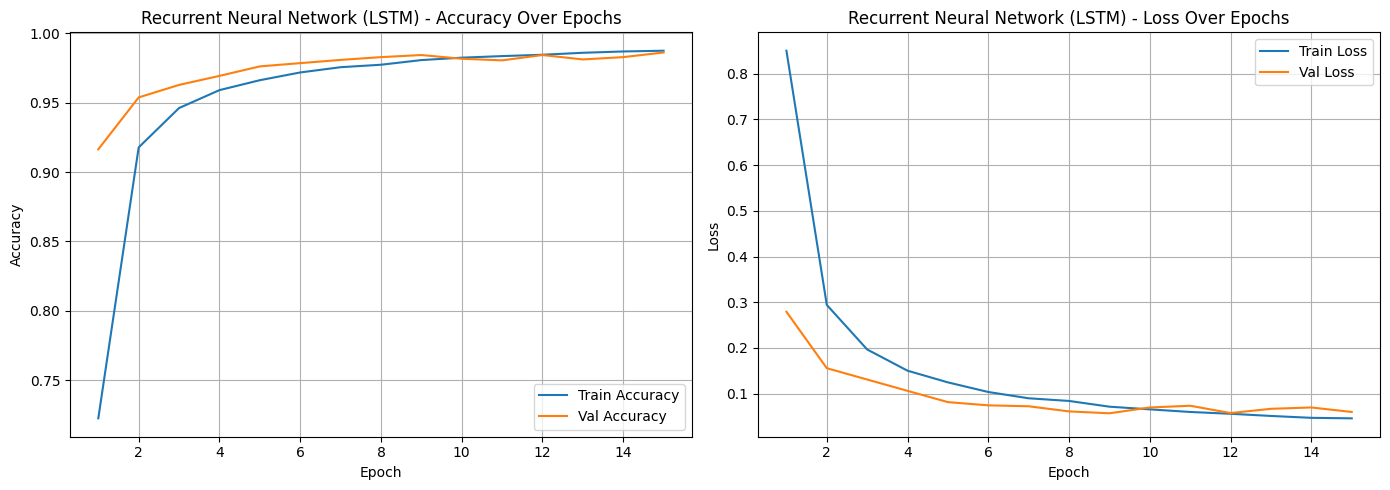

In [65]:
# plotting the learning curves
plot_learning_curves(history_rnn, "Recurrent Neural Network (LSTM)")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


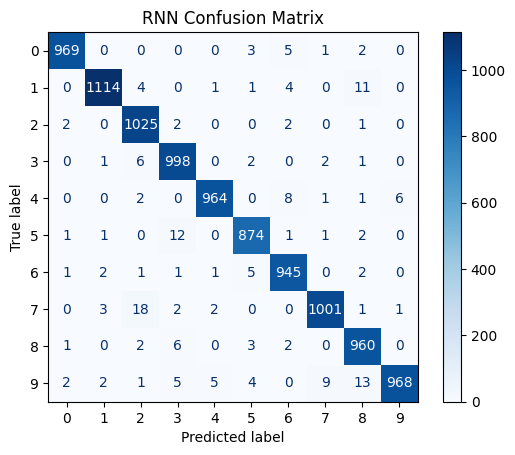

In [66]:
# Confusion Matrix to check classifications and misclassifications
y_pred_rnn = np.argmax(model_rnn.predict(x_test_rnn), axis=1)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rnn, cmap='Blues')
plt.title("RNN Confusion Matrix")
plt.show()


In [67]:
# Printing AUC Score for RNN
y_prob_rnn = model_rnn.predict(x_test_rnn)
auc_rnn = roc_auc_score(y_test_cat, y_prob_rnn, multi_class='ovr')
print(f"AUC Score (RNN): {auc_rnn:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
AUC Score (RNN): 0.9996


**Comparison**

In [69]:
print("Total Params (NN):", model_nn.count_params())
print("Total Params (CNN):", model_cnn.count_params())
print("Total Params (RNN):", model_rnn.count_params())


Total Params (NN): 109386
Total Params (CNN): 121930
Total Params (RNN): 36554


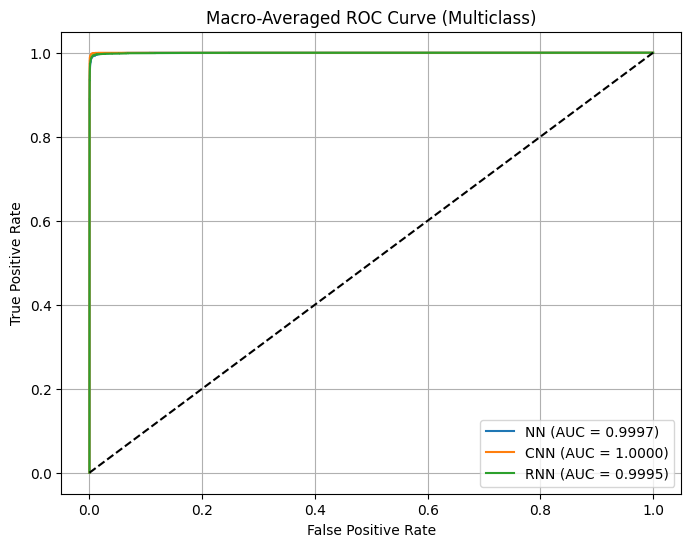

In [76]:
# ROC Curve Comparison
from sklearn.metrics import RocCurveDisplay

y_test_bin = label_binarize(y_test, classes=range(10))

plt.figure(figsize=(8, 6))

# Compute ROC for each model
for probs, label in zip(
    [y_prob_nn, y_prob_cnn, y_prob_rnn],
    ['NN', 'CNN', 'RNN']
):
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), probs.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Macro-Averaged ROC Curve (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


**Conclusion**

All three models demonstrated near-perfect classification performance on the MNIST dataset. The CNN achieved the highest AUC of 1.0000, followed closely by the NN (0.9997) and the RNN (0.9995). The ROC curves of all models hug the top-left region of the plot, confirming their strong predictive capabilities. These results support the effectiveness of deep learning models, particularly CNNs, in digit classification tasks.



| Metric              | Neural Network (NN) | Convolutional NN (CNN) | Recurrent NN (RNN) |
| ------------------- | ------------------- | ---------------------- | ------------------ |
| **Final Train Acc** | 98.39%              | 99.47%                 | 98.73%             |
| **Final Val Acc**   | 98.20%              | **99.18%**             | 98.60%             |
| **Final Val Loss**  | 0.0728              | **0.0349**             | 0.0597             |
| **AUC Score**       | 0.9997              | **1.0000**             | 0.9995             |
| **Total Params**    | 109,386             | 121,930                | **36,554**         |
| **Training Speed**  | Fast                | Moderate               | Slow               |
| **Overfitting**     | Mild                | Minimal                | Slight             |
